### 記事本
#### I. 需要解決的問題
* 處理 Imbalance 問題
* Table test
* 做 Cross Validation


In [ ]:
import numpy as np
import pandas as pd

In [11]:
GDSC_TCGA_Docetaxel = pd.read_csv('data/GDSC_TCGA_Docetaxel/GDSC_TCGA_Docetaxel.csv')
GDSC_TCGA_Docetaxel.columns.values[0] = "CELL_LINE_NAME"
GDSC_TCGA_Docetaxel

,CELL_LINE_NAME,IC50,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,SMIM6,SLC35G6,OR4N3P,MRPL46,HPR,MIA,ZNF234,MYH4,LINC00526,KRT18P55
0,MC-CAR,0.007317,-1.771265,0.610600,0.401711,1.106639,0.892463,5.280920,-0.448906,-0.603844,...,0.014012,-1.774443,-0.564932,0.745884,0.067401,0.071798,-0.795007,0.208152,0.920566,-0.108400
1,PFSK-1,0.001761,0.589651,-0.481344,-0.102904,0.166903,0.033028,-0.297542,2.267238,-1.950722,...,-0.414321,0.132181,0.459550,1.231701,0.095877,-0.506559,0.573636,-0.052642,-1.414468,-0.830343
2,ES5,0.001184,0.824778,-0.140724,-0.000743,0.908738,0.324213,-0.372808,0.545903,-2.270533,...,-0.555727,0.054253,-0.706297,1.045812,-0.198301,-0.375373,0.997468,-0.444827,1.287275,0.093119
3,ES7,0.000550,0.876942,5.304997,-0.407386,-0.529356,-0.467901,-0.432257,-0.618523,-1.732870,...,-0.555933,-0.124543,0.173441,0.900766,0.194683,-0.329766,1.099872,-0.097426,-0.915754,-0.337166
4,EW-11,0.001664,0.907022,0.544350,0.447872,0.064185,1.012554,-0.206224,1.601955,-2.168519,...,-0.468249,-0.933497,-0.171144,0.356018,-0.742446,-0.481873,0.562201,-0.229934,0.659579,-1.023215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,RCC-AB,0.013015,0.498120,-0.588126,-0.078362,-0.204308,1.648799,-0.328670,1.388902,1.055700,...,1.791280,-0.772050,-0.998507,-0.517322,0.335512,-0.396386,-0.317182,-0.412571,-0.283819,2.256465
846,RCC-MF,0.026358,0.522648,-0.515479,0.071471,-1.501136,-0.977670,-0.383396,1.748097,0.748840,...,0.754285,1.171674,1.267953,0.239368,0.253742,-0.458750,0.356426,-0.293842,-0.722185,-0.124967
847,KMS-11,0.034812,-1.742729,-0.642450,0.526023,0.401107,1.144835,-0.201753,-0.596266,-0.111974,...,-0.262681,-1.134921,0.819662,-0.628280,-0.037454,-0.168049,-1.224777,-0.058288,-0.156636,-0.346016
848,SNU-61,0.162531,0.743705,-0.347487,0.039888,1.756746,0.131114,-0.402442,-0.415835,1.021365,...,1.090940,-0.316082,-1.317266,0.094575,0.097480,-0.244712,-0.725647,0.108508,0.847898,1.846166


In [17]:
#   依照IC50為GDSC_TCGA_Docetaxel加上label
GDSC_TCGA_D_train_data_label = np.asarray(GDSC_TCGA_Docetaxel["IC50"]>0.0125)
# GDSC_TCGA_D_train_data_label

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [16]:
GDSC_TCGA_D_train_data = GDSC_TCGA_Docetaxel.drop(labels=['CELL_LINE_NAME', 'IC50'], axis=1)
# GDSC_TCGA_D_train_data = GDSC_TCGA_D_train_data.assign(RS = RS_bool)
GDSC_TCGA_D_train_data

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SMIM6,SLC35G6,OR4N3P,MRPL46,HPR,MIA,ZNF234,MYH4,LINC00526,KRT18P55
0,-1.771265,0.610600,0.401711,1.106639,0.892463,5.280920,-0.448906,-0.603844,-0.834682,0.300012,...,0.014012,-1.774443,-0.564932,0.745884,0.067401,0.071798,-0.795007,0.208152,0.920566,-0.108400
1,0.589651,-0.481344,-0.102904,0.166903,0.033028,-0.297542,2.267238,-1.950722,-1.104072,0.867475,...,-0.414321,0.132181,0.459550,1.231701,0.095877,-0.506559,0.573636,-0.052642,-1.414468,-0.830343
2,0.824778,-0.140724,-0.000743,0.908738,0.324213,-0.372808,0.545903,-2.270533,-0.368256,1.829893,...,-0.555727,0.054253,-0.706297,1.045812,-0.198301,-0.375373,0.997468,-0.444827,1.287275,0.093119
3,0.876942,5.304997,-0.407386,-0.529356,-0.467901,-0.432257,-0.618523,-1.732870,-0.126682,1.016972,...,-0.555933,-0.124543,0.173441,0.900766,0.194683,-0.329766,1.099872,-0.097426,-0.915754,-0.337166
4,0.907022,0.544350,0.447872,0.064185,1.012554,-0.206224,1.601955,-2.168519,0.055405,1.565683,...,-0.468249,-0.933497,-0.171144,0.356018,-0.742446,-0.481873,0.562201,-0.229934,0.659579,-1.023215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.498120,-0.588126,-0.078362,-0.204308,1.648799,-0.328670,1.388902,1.055700,-0.058142,0.260766,...,1.791280,-0.772050,-0.998507,-0.517322,0.335512,-0.396386,-0.317182,-0.412571,-0.283819,2.256465
846,0.522648,-0.515479,0.071471,-1.501136,-0.977670,-0.383396,1.748097,0.748840,0.833385,-0.686824,...,0.754285,1.171674,1.267953,0.239368,0.253742,-0.458750,0.356426,-0.293842,-0.722185,-0.124967
847,-1.742729,-0.642450,0.526023,0.401107,1.144835,-0.201753,-0.596266,-0.111974,0.150691,0.089586,...,-0.262681,-1.134921,0.819662,-0.628280,-0.037454,-0.168049,-1.224777,-0.058288,-0.156636,-0.346016
848,0.743705,-0.347487,0.039888,1.756746,0.131114,-0.402442,-0.415835,1.021365,0.079219,-1.294155,...,1.090940,-0.316082,-1.317266,0.094575,0.097480,-0.244712,-0.725647,0.108508,0.847898,1.846166


### 讀取測試資料集

In [8]:
Patients_TCGA_Docetaxel = pd.read_csv('data/GDSC_TCGA_Docetaxel/Patients_TCGA_Docetaxel.csv')
Patients_TCGA_Docetaxel.columns.values[0] = "Patients_ID"
Patients_TCGA_Docetaxel

,Patients_ID,label,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,SMIM6,SLC35G6,OR4N3P,MRPL46,HPR,MIA,ZNF234,MYH4,LINC00526,KRT18P55
0,TCGA.50.5930.01A,0,-0.081350,-0.018003,-0.717931,-1.539410,-1.216847,0.108111,0.289653,0.783037,...,-1.746324,0.257519,0.074542,-0.973352,-0.354552,-0.229879,-0.127647,-0.157220,-0.868103,-0.695200
1,TCGA.53.7624.01A,0,-0.522505,-0.018003,0.184457,1.240316,1.756752,-1.065763,-1.682642,1.859819,...,-0.352620,0.421365,0.074542,1.884520,-0.429709,-0.667936,1.465407,-0.157220,-0.459363,2.629445
2,TCGA.A2.A0CK.01A,1,0.818422,2.330359,-0.890597,-0.038683,-0.328867,-0.157596,0.105049,-0.492415,...,-0.154097,-0.319665,-0.075532,0.299359,-0.098560,0.328741,-0.575729,-0.040781,0.931449,-0.575186
3,TCGA.A2.A3XS.01A,0,1.229073,-0.545507,1.005106,-0.538867,-0.276611,0.080805,-0.172992,-0.178448,...,0.012412,-0.142614,-0.075532,1.229369,4.276112,1.486760,-0.560333,-0.121356,1.316177,-0.575186
4,TCGA.A2.A3XT.01A,1,-1.442696,-0.338689,1.045560,-0.457079,0.980792,2.244373,-0.621860,1.277150,...,-0.096454,-0.155759,-0.075532,0.729400,-0.175587,1.394517,-1.649600,-0.060866,0.857928,0.118705
5,TCGA.A2.A3Y0.01A,1,-0.948059,-0.456627,-1.451546,-1.379153,0.205031,0.210501,-0.743640,-1.095117,...,-0.112815,-0.025107,0.817348,0.025053,-0.222359,0.697818,-1.598057,-0.121356,0.029634,-0.575186
6,TCGA.AC.A2FB.01A,1,0.469781,-0.561535,-1.043632,0.608659,0.062359,0.623068,0.644343,-0.311580,...,2.459230,-0.319665,-0.075532,-0.291696,-0.000966,0.655083,0.089274,-0.046772,-0.901677,1.745231
7,TCGA.BH.A5IZ.01A,1,0.368275,-0.732823,1.260744,-0.762613,1.864362,-0.079273,-1.016461,1.267091,...,0.142332,-0.319665,-0.075532,0.578728,0.482124,1.087226,-1.095904,-0.121356,0.137532,-0.575186
8,TCGA.CG.5725.01A,0,2.342875,0.082565,0.070810,-0.480288,1.293092,-1.961262,-1.309806,-0.653198,...,-1.812188,4.341394,-0.238773,0.579155,-0.222425,-1.580256,-1.164883,-0.437475,1.629596,0.768726
9,TCGA.CN.4731.01A,0,0.503427,-0.056944,0.624364,-0.573450,-0.403624,-0.716342,0.637767,0.451514,...,-0.024197,1.009303,-0.096568,-0.736548,-0.114433,2.257101,0.126918,-0.650059,1.012949,-0.556279


In [9]:
P_TCGA_D_label = Patients_TCGA_Docetaxel[["label"]]
P_TCGA_D_label

,label
0,0
1,0
2,1
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [18]:
P_TCGA_D_wo_label = Patients_TCGA_Docetaxel.drop(labels=['label', 'Patients_ID'], axis=1)
P_TCGA_D_wo_label

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SMIM6,SLC35G6,OR4N3P,MRPL46,HPR,MIA,ZNF234,MYH4,LINC00526,KRT18P55
0,-0.081350,-0.018003,-0.717931,-1.539410,-1.216847,0.108111,0.289653,0.783037,0.138750,-0.431759,...,-1.746324,0.257519,0.074542,-0.973352,-0.354552,-0.229879,-0.127647,-0.157220,-0.868103,-0.695200
1,-0.522505,-0.018003,0.184457,1.240316,1.756752,-1.065763,-1.682642,1.859819,1.886379,-0.261790,...,-0.352620,0.421365,0.074542,1.884520,-0.429709,-0.667936,1.465407,-0.157220,-0.459363,2.629445
2,0.818422,2.330359,-0.890597,-0.038683,-0.328867,-0.157596,0.105049,-0.492415,-1.671058,-1.264372,...,-0.154097,-0.319665,-0.075532,0.299359,-0.098560,0.328741,-0.575729,-0.040781,0.931449,-0.575186
3,1.229073,-0.545507,1.005106,-0.538867,-0.276611,0.080805,-0.172992,-0.178448,-0.822245,0.263540,...,0.012412,-0.142614,-0.075532,1.229369,4.276112,1.486760,-0.560333,-0.121356,1.316177,-0.575186
4,-1.442696,-0.338689,1.045560,-0.457079,0.980792,2.244373,-0.621860,1.277150,-0.616460,-0.248031,...,-0.096454,-0.155759,-0.075532,0.729400,-0.175587,1.394517,-1.649600,-0.060866,0.857928,0.118705
5,-0.948059,-0.456627,-1.451546,-1.379153,0.205031,0.210501,-0.743640,-1.095117,0.017669,0.147967,...,-0.112815,-0.025107,0.817348,0.025053,-0.222359,0.697818,-1.598057,-0.121356,0.029634,-0.575186
6,0.469781,-0.561535,-1.043632,0.608659,0.062359,0.623068,0.644343,-0.311580,0.402306,-0.593767,...,2.459230,-0.319665,-0.075532,-0.291696,-0.000966,0.655083,0.089274,-0.046772,-0.901677,1.745231
7,0.368275,-0.732823,1.260744,-0.762613,1.864362,-0.079273,-1.016461,1.267091,-0.015284,0.942918,...,0.142332,-0.319665,-0.075532,0.578728,0.482124,1.087226,-1.095904,-0.121356,0.137532,-0.575186
8,2.342875,0.082565,0.070810,-0.480288,1.293092,-1.961262,-1.309806,-0.653198,1.303685,-0.447866,...,-1.812188,4.341394,-0.238773,0.579155,-0.222425,-1.580256,-1.164883,-0.437475,1.629596,0.768726
9,0.503427,-0.056944,0.624364,-0.573450,-0.403624,-0.716342,0.637767,0.451514,0.181234,0.554887,...,-0.024197,1.009303,-0.096568,-0.736548,-0.114433,2.257101,0.126918,-0.650059,1.012949,-0.556279


In [21]:
CMAP = "copper"
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns

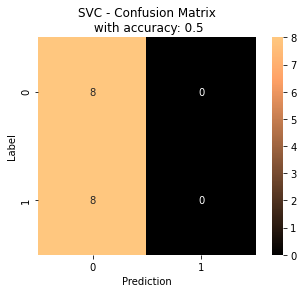

In [22]:
SVC_Model = SVC()
SVC_Model.fit(GDSC_TCGA_D_train_data, GDSC_TCGA_D_train_data_label)
SVC_result = SVC_Model.predict(P_TCGA_D_wo_label)
SVC_score = SVC_Model.score(P_TCGA_D_wo_label, P_TCGA_D_label)
SVC_score = np.around(SVC_score, decimals=3)

SVC_cm = confusion_matrix(P_TCGA_D_label, SVC_result)
sns.heatmap(SVC_cm, square=True, annot=True, cmap=CMAP, cbar=True, fmt="")
SVC_plot = plt.xlabel("Prediction")
SVC_plot = plt.ylabel("Label")
SVC_plot = plt.title(f"SVC - Confusion Matrix\n with accuracy: {SVC_score}")

plt.show(SVC_plot)

